<a href="https://colab.research.google.com/github/Gabuni19/GabUni--Codigos-cpp/blob/main/Metodo_del_Gradiente_Mejorado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Función :
$$f(x,y) =  x^{2}+xy-3x+y^{2}$$


In [4]:
import sympy as sp

#Definimos las variables
x,y = sp.var("x y")

#Definimos la funcion a minimizar
f =  x**2 + y**2 + x*y - 3*x

In [5]:
f

x**2 + x*y - 3*x + y**2

In [6]:
f.subs([ (x,0),(y,1) ])

1

Derivadas de f(x,y):
$$\frac{\partial f}{\partial x} = 2x+y-3$$
$$\frac{\partial f}{\partial y} = x+2y$$

In [7]:
#Definimos la derivada respecto de x
fx = sp.diff(f,x)
fx

2*x + y - 3

In [8]:
#Definimos la derivada respecto de y
fy = sp.diff(f,y)
fy

x + 2*y

Gradiante de f:
$$\nabla f = \left( \frac{\partial f}{\partial x}, \frac{\partial f}{\partial y} \right)$$


In [15]:
#Definimos la gradiente
fx = sp.diff(f,x)
fy = sp.diff(f,y)
G = sp.Matrix([fx,fy])
G

Matrix([
[2*x + y - 3],
[    x + 2*y]])

In [11]:
G.subs([(x,2),(y,2)])

Matrix([
[3],
[6]])

In [14]:
G.subs([(x,2),(y,2)])[0]

3

In [ ]:
c = G.subs([(x,2),(y,2)])[0]
float(sp.Float(c))

3.0

Función g :
$$ g(θ) = f( x + θ∇f )$$

In [16]:
thetha = sp.var("thetha")
g = f.subs([ (x,2 + thetha*1), (y,1 + thetha*2)])
g

-3*thetha + (thetha + 2)**2 + (thetha + 2)*(2*thetha + 1) + (2*thetha + 1)**2 - 6

In [1]:
import numpy as np
import pandas as pd
# Creamos un diccionario para una mejor grafica
values = {
    "x": [],
    "y": [],
    "thetha":[]
}


In [2]:
df = pd.DataFrame(values)

In [3]:
df

,x,y,thetha


Metodo del Gradiente

In [64]:
import numpy as np
import pandas as pd

# Creamos un diccionario para una mejor grafica
values = {
    "x": [],
    "y": [],
    "thetha":[]
}


def AgregarValores(dic,x,y,thetha):
  dic["x"].append(x)
  dic["y"].append(y)
  dic["thetha"].append(thetha)


def Min_G(f,G0,G1,x_min,y_min):
  thetha = sp.var("thetha")
  g = f.subs([ (x,x_min + thetha*G0), (y,y_min + thetha*G1)])
  df=sp.diff(g,thetha)
  thetha = sp.solve(sp.Eq(df, 0))
  if thetha:
    return thetha[0]
  else:
    return 0

def Metodo_gradiente(f,n_iter=1000,epsilon=0.0001):

  fx = sp.diff(f,x)
  fy = sp.diff(f,y)
  G = sp.Matrix([fx,fy])

  x_min = sp.Matrix([np.random.randint(5)])[0]
  y_min = sp.Matrix([np.random.randint(5)])[0]
  i=0


  while(i<=n_iter):
    x_current = x_min
    y_current = y_min

    G0 = G.subs([(x,x_min),(y,y_min)])[0]
    G1 = G.subs([(x,x_min),(y,y_min)])[1]

    thetha = Min_G(f,G0,G1,x_min,y_min)

    AgregarValores(values,float(x_min.evalf()),float(y_min.evalf()),float(thetha))

    x_min = x_min + thetha*G0
    y_min = y_min + thetha*G1

    if(np.abs(x_current-x_min) < epsilon and np.abs(y_current-y_min) < epsilon):
      print(f"Iter : {i}")
      print(f"x: {x_min} - y: {y_min}")
      return x_min.evalf(),y_min.evalf()

    i+=1

  print("No converge")
  return x_min.evalf(),y_min.evalf()


#Definimos las variables
x,y = sp.var("x y")

#Definimos la funcion a minimizar
f =  x**2 + y**2 + x*y - 3*x

Metodo_gradiente(f)

Iter : 1
x: 2 - y: -1


(2.00000000000000, -1.00000000000000)

In [46]:
values=pd.DataFrame(values)
values

,x,y,thetha
0,0.0,1.0,-1.0
1,2.0,-1.0,0.0


In [47]:
values.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       2 non-null      float64
 1   y       2 non-null      float64
 2   thetha  2 non-null      float64
dtypes: float64(3)
memory usage: 176.0 bytes


In [48]:
values.describe()

,x,y,thetha
count,2.000000,2.000000,2.000000
mean,1.000000,0.000000,-0.500000
std,1.414214,1.414214,0.707107
min,0.000000,-1.000000,-1.000000
25%,0.500000,-0.500000,-0.750000
50%,1.000000,0.000000,-0.500000
75%,1.500000,0.500000,-0.250000
max,2.000000,1.000000,0.000000


<Axes: ylabel='Frequency'>

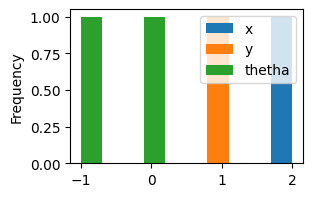

In [49]:
values.plot(kind='hist',figsize=(3,2))

<Axes: title={'center': 'Convergencia de Valores'}>

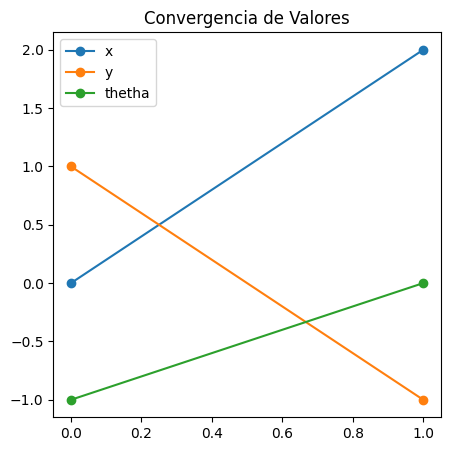

In [50]:
values.plot(marker='o', linestyle='-', title='Convergencia de Valores',figsize=(5,5))

<Axes: >

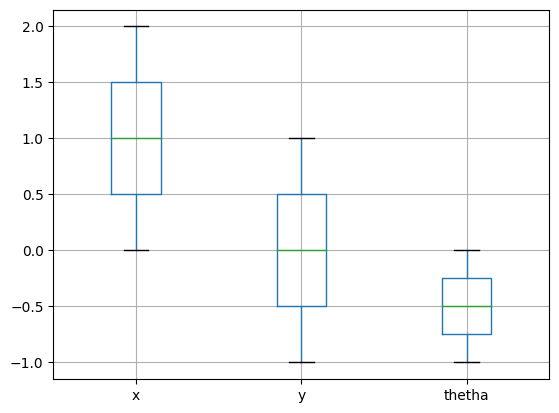

In [51]:
values.boxplot()

Graficamos la funcion inicial

In [ ]:
pip install plotly

In [52]:
import numpy as np
import plotly.graph_objects as go

# Crear una malla de valores para x e y
x_vals = np.linspace(-5, 5, 100)
y_vals = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x_vals, y_vals)

# Evaluar la función en la malla
Z = np.array([[float(f.subs({x: x_val, y: y_val}).evalf()) for x_val in x_vals] for y_val in y_vals])

# Crear el gráfico 3D
fig = go.Figure(data=[go.Surface(z=Z, x=X, y=Y, colorscale='viridis', showscale=False)])

# Configurar los ejes y el título
fig.update_layout(scene = dict(
                    xaxis_title='X',
                    yaxis_title='Y',
                    zaxis_title='F(x, y)'),
                    title='Gráfico f(x,y)',
                    autosize=False,
                    width=500, height=500,
                    margin=dict(l=65, r=50, b=65, t=90))

# Agregar los puntos de convergencia desde el DataFrame en color rojo
fig.add_trace(go.Scatter3d(x=values['x'], y=values['y'], z=[float(f.subs({x: x_val, y: y_val}).evalf()) for x_val, y_val in zip(values['x'], values['y'])], mode='markers', marker=dict(size=4, color='red',symbol='x')))

fig.show()


Otras funciones

In [65]:
import sympy as sp

#Definimos las variables
x,y = sp.var("x y")

#Definimos la funcion a minimizar
f = -(4*x + 6*y - 2*x**2 - 2*x* y-2*y**2)

In [66]:
f

2*x**2 + 2*x*y - 4*x + 2*y**2 - 6*y

In [67]:
# Creamos un diccionario para una mejor grafica
values = {
    "x": [],
    "y": [],
    "thetha":[]
}

Metodo_gradiente(f)

Iter : 11
x: 930115659251624455/2790377248649981952 - y: 465072965073366521/348797156081247744


(0.333329717227886, 1.33336226217691)

In [68]:
df = pd.DataFrame(values)
df

,x,y,thetha
0,0.000000,4.000000,-0.185897
1,-0.743590,2.141026,-0.381579
2,0.283738,1.730094,-0.185897
3,0.173103,1.453506,-0.381579
4,0.325954,1.392366,-0.185897
5,0.309493,1.351213,-0.381579
6,0.332235,1.342116,-0.185897
7,0.329786,1.335994,-0.381579
8,0.333170,1.334640,-0.185897
9,0.332806,1.333729,-0.381579


<Axes: title={'center': 'Convergencia de Puntos'}>

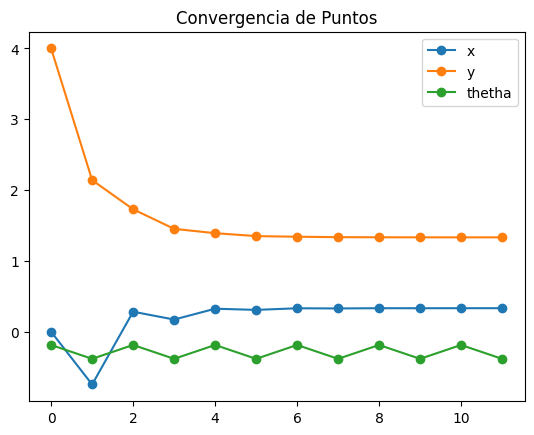

In [69]:
df.plot(marker="o",title="Convergencia de Puntos")